# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [12]:
df=pd.read_csv("/content/forestfires (1).csv")

In [13]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [14]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [15]:
df.drop(['month','day'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [17]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<ipython-input-19-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

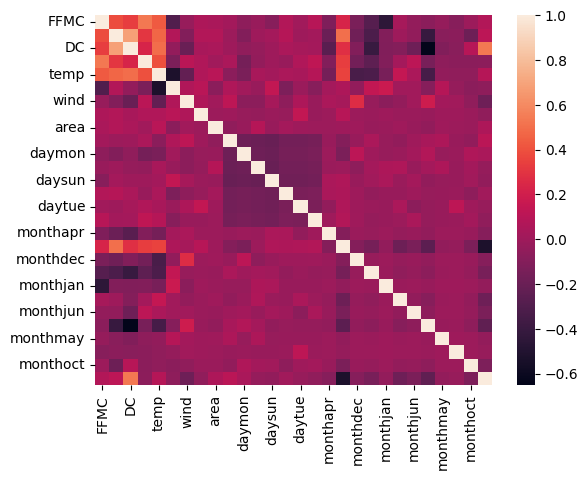

In [19]:
sns.heatmap(df.corr())

# Feature Scaling

In [20]:
X=df.drop(['size_category'],axis=1)
Y=df['size_category']

In [21]:
X.shape

(517, 28)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

#  SVM Model Building using rbf kernel

In [23]:
model=SVC(kernel='rbf',C=15)

In [24]:
model.fit(x_train,y_train)

SVC(C=15)

In [25]:
ypred=model.predict(x_test)

In [26]:
accuracy_score(y_test,ypred)

0.8557692307692307

In [27]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       large       1.00      0.52      0.68        31
       small       0.83      1.00      0.91        73

    accuracy                           0.86       104
   macro avg       0.91      0.76      0.79       104
weighted avg       0.88      0.86      0.84       104



In [28]:
res=cross_val_score(model,X,Y,cv=10)

In [29]:
res.mean()

0.8491704374057315

# SVM Model Building using linear kernel

In [30]:
model1=SVC(kernel='linear',C=15)
model1.fit(x_train,y_train)
ypred1=model1.predict(x_test)

In [31]:
accuracy_score(y_test,ypred1)

0.9807692307692307

In [32]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

       large       1.00      0.94      0.97        31
       small       0.97      1.00      0.99        73

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



In [33]:
res1=cross_val_score(model1,X,Y,cv=10)
res1.mean()

0.9883107088989442

# SVM Model Building using polynomial kernel

In [34]:
model2=SVC(kernel='poly',C=15)
model2.fit(x_train,y_train)
ypred2=model2.predict(x_test)

In [35]:
accuracy_score(y_test,ypred2)

0.8557692307692307

In [36]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

       large       1.00      0.52      0.68        31
       small       0.83      1.00      0.91        73

    accuracy                           0.86       104
   macro avg       0.91      0.76      0.79       104
weighted avg       0.88      0.86      0.84       104



In [37]:
res2=cross_val_score(model2,X,Y,cv=10)
res2.mean()

0.8550150829562593

# SVM Model Building using sigmoid kernel

In [38]:
model3=SVC(kernel='sigmoid',C=15)
model3.fit(x_train,y_train)
ypred3=model3.predict(x_test)

In [39]:
accuracy_score(y_test,ypred3)

0.6442307692307693

In [40]:
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

       large       0.31      0.16      0.21        31
       small       0.70      0.85      0.77        73

    accuracy                           0.64       104
   macro avg       0.51      0.51      0.49       104
weighted avg       0.59      0.64      0.60       104



In [41]:
res3=cross_val_score(model3,X,Y,cv=10)
res3.mean()

0.6217948717948719